# 컨테이너 야드 내 대기 Queue 및 차량 수 예측 분석 보고서
<br/>
<br/>
<br/>

시뮬레이션은 주어진 수의 트럭을 처리하고, 이들 각각에 대해 처리 시간 및 사용 가능한 블록을 고려하여 동작합니다. 트럭은 각자의 도착 시간에 따라 시스템에 도착하고, 트럭이 작업을 수행하기 위해 선택한 블록에 따라 기다릴 수도 있고, 바로 작업을 시작할 수도 있습니다. 이 모든 과정은 시뮬레이션에서 추적되며, 결과는 최종 보고서에 기록됩니다.

<u>이 시뮬레이션의 목표는 주어진 조건 하에서 트럭 터미널 운영의 복잡성을 이해하고, 어떤 변수가 시스템 성능에 영향을 미치는지 파악하는 것입니다. 이를 통해 최적의 운영 전략을 도출하거나, 새로운 정책이나 조치가 터미널 운영에 어떤 영향을 미칠지 예측할 수 있습니다.</u>

- <b><span style="color:black; background-color:#fcc419; font-size:100%">컨테이너 야드 내 요인을 반영한 시뮬레이션 생성 및 Queue 최적화</span></b>
- <b><span style="color:black; background-color:#fcc419; font-size:100%">머신러닝, 딥러닝을 통한 컨테이너 야드 내 요인 가중치 학습 및 야드 내 차량 수 예측</span></b>

> chapter01

### 컨테이너 야드 내 요인을 반영한 시뮬레이션 생성 및 Queue 최적화

In [1]:
import simpy 
import random
import csv

- 사용자 입력값 : 차량수, 실행시간, 작업장수(반입, 반출)
- 입력방법 : 웹 화면 내 작성

In [7]:
# 웹 화면에서 입력받는 설정값(차량수, 실행시간, 블록수)
trucknum = 1000
processtime = 2880
blocknum = 5

- 입력값 및 컨테이너 야드 내 요인을 반영한 시뮬레이션 생성
    - 요인 : 작업코드, 컨테이너 코드, 컨테이너 사이즈, 반출입 작업장, 작업시간 등

In [ ]:
for i in range(trucknum):
    Truck(env, i+1, arrival_interval, unload_trucks_completed, load_trucks_completed, unload_load_trucks_completed, operation
        , unload_spot, load_spot, end_wait_start_unload_work, end_wait_start_load_work, visible, container_status, container_size)

env.run(until=processtime)

for block in range(blocknum):
    unload_spot[block] = simpy.Resource(env, capacity=1)

- 차량의 작업장(블록) 배정 최적화를 통한 Queue 최소화 방법
    - 현재 차량 작업장(블록) 배정 시 직전 차량이 배정된 작업장(블록) 제외
    - 차량 입차 시 대기차량 및 작업차량 수가 가장 적은 작업장(블록)으로 배정

| 구분 | 최적화 전 | 최적화 후 | 감소율 |
| -------- | -------- | -------- | -------|
| 야드 내 머문 시간(분)    | 60020   | 52487   |  13%  |
| 작업장에서 대기한 시간(분)    | 28230   | 20360   |  28%   |


In [ ]:
if select_operation == 'unload':
    ## 대기차량 및 작업 차량 수가 가장 적은 블록으로 할당(최적화)
    min_unload_spots = []
    min_load_spots = []
    for spot, resource in self.unload_spot.items():
        if spot != before_unload:
            if (len(resource.queue)+resource.count)  < min_unload:
                min_unload = (len(resource.queue)+resource.count)
                # 바로 직전에 할당한 블록 제외(최적화)
                min_unload_spots.append(spot)
            elif (len(resource.queue)+resource.count) == min_unload:
                min_unload_spots.append(spot)

    for spot, resource in self.load_spot.items():
        if spot != before_load:
            if (len(resource.queue)+resource.count)  < min_load:
                min_load = (len(resource.queue)+resource.count)
                min_load_spots.append(spot)
            elif (len(resource.queue)+resource.count) == min_load:
                min_load_spots.append(spot)

    assigned_unload_spot = random.choice(min_unload_spots)
    before_unload = assigned_unload_spot
    assigned_load_spot = random.choice(min_load_spots)
    before_load =  assigned_load_spot
    print(f"트럭 {self.name}이(가) {assigned_unload_spot} 블록으로 배정되습니다.")

> chapter02

### 머신러닝, 딥러닝을 통한 컨테이너 야드 내 요인 가중치 학습 및 미래 야드 내 차량 수 예측

- 분석 목표
    - 주어진 트럭 시뮬레이션 데이터를 바탕으로 시계열 분석을 수행하고, 야드 내 차량의 수(in_yard_count)를 예측하였습니다. 본 분석에서는 XGBoost, RandomForest 기반의 머신러닝 모델과 CNN, LSTM(Long Short-Term Memory) 기반의 딥러닝 모델을 활용하였습니다.

- 데이터
    - 분석에 사용된 데이터는 트럭 시뮬레이션 결과로부터 얻어진 데이터입니다. 
        - 작업 시간(work_time)
        - 작업장 대기 시간(spot_wait_time)
        - 작업 유형(op)
        - 컨테이너 상태(container_status)
        - 컨테이너 크기(container_size)
        - 야드 내 차량 수(in_yard_count)
        - 반입장 블록(unload_block)
        - 반출장 블록(load_block)

- 분석에 사용한 데이터 간 상관관계 히트맵

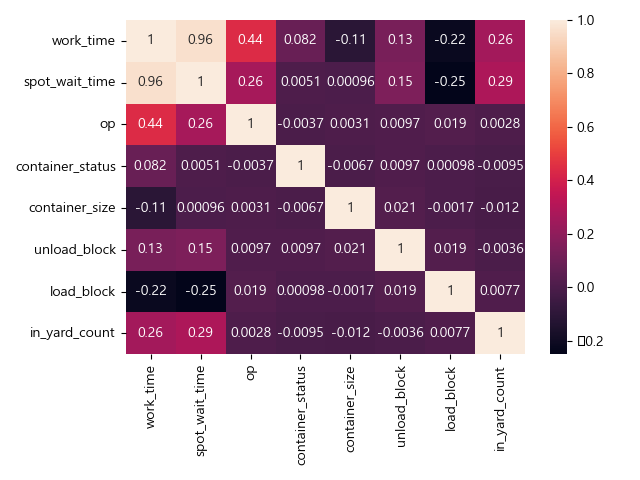

- 데이터 전처리
    - 문자열 숫자화
    - 데이터 분할
    - 데이터 정규화

In [ ]:
data['op'] = data['op'].replace({'unload':1, 'load':2, 'both':3})
data['container_status'] =data['container_status'].replace({'fresh':1, 'short-term':2, 'long-term':3})
data['container_size'] = data['container_size'].replace({'small':1, 'medium':2, 'large':3})
data['unload_block'] = data['unload_block'].replace({'A':1, 'B':2,'C':3, 'D':4, 'E':5})
data['load_block'] = data['load_block'].replace({'Q':1, 'W':2,'X':3, 'Y':4, 'Z':5})
in_time_value1 = list(filter(lambda y : y<int_index_time, index_times_list))
# 현재 시간보다 출차를 빨리한 차량 대수
in_time_value2 = list(filter(lambda x: x< int_in_time, out_times_list))
# 현재 터미널 내 트럭 대수 = 총 트럭 - 출차 대수(본인 트럭 제외)
In_yard_truck_volume = len(in_time_value1)-len(in_time_value2)
train_size = int(len(X) * 0.8)

# 시간 순서를 유지하면서 데이터 분할
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

scaler = MinMaxScaler()
X_train_scaled = np.zeros_like(X_train)
X_test_scaled = np.zeros_like(X_test)

for i in range(X_train.shape[2]):
    X_train_scaled[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_test_scaled[:, :, i] = scaler.transform(X_test[:, :, i])

- 방법론
    - 머신러닝 학습 모델 구성
        1. RNN(LSTM) : best model
        2. XGBoost
        3. RandomForest
        4. CNN

## LSTM 모델
LSTM 모델을 사용하여 시계열 예측을 수행하였습니다. LSTM은 순차적이고 시간에 의존적인 데이터를 처리하는데 효과적인 딥러닝 모델입니다.

우선, 과거 50개 타임스텝의 정보를 바탕으로 다음 타임스텝의 in_yard_count를 예측하는 방식으로 데이터를 구성하였습니다.

훈련 데이터와 테스트 데이터는 시간 순서를 유지하면서 전체 데이터의 80%를 훈련 데이터, 나머지 20%를 테스트 데이터로 분할하였습니다. 그 다음, 모든 특성 데이터를 정규화하였습니다.

모델 구조는 LSTM 레이어, 두 개의 완전 연결(Dense) 레이어, 그리고 마지막 출력 레이어로 구성되어 있습니다. 모델은 평균 제곱 오차(mean squared error)를 손실 함수로 사용하며, Adam 최적화기를 사용하여 100 에포크 동안 학습하였습니다.

모델의 구성은 다음과 같습니다.
- LSTM Layer: LSTM 레이어는 64개의 유닛으로 구성되었으며, 입력 데이터의 형태는 (lookback, X_train.shape[-1])입니다. 여기서 lookback은 과거 정보를 얼마나 많이 보고 싶은지를 결정하는 변수로, 이 경우에는 50으로 설정되었습니다. X_train.shape[-1]은 입력 데이터의 특성 수를 나타냅니다.

- Dense Layer: 두 개의 Dense 레이어가 추가되었습니다. 첫 번째 Dense 레이어는 64개의 유닛과 'relu' 활성화 함수를 사용합니다. 두 번째 Dense 레이어는 32개의 유닛과 'relu' 활성화 함수를 사용합니다.

- Output Layer: 마지막으로, 단일 유닛과 함께 Dense 레이어가 추가되었습니다. 이 레이어는 모델의 최종 출력을 생성합니다.

In [ ]:
# LSTM 모델
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, input_shape=(lookback, X_train.shape[-1])))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=1))

    - 결과 그래프

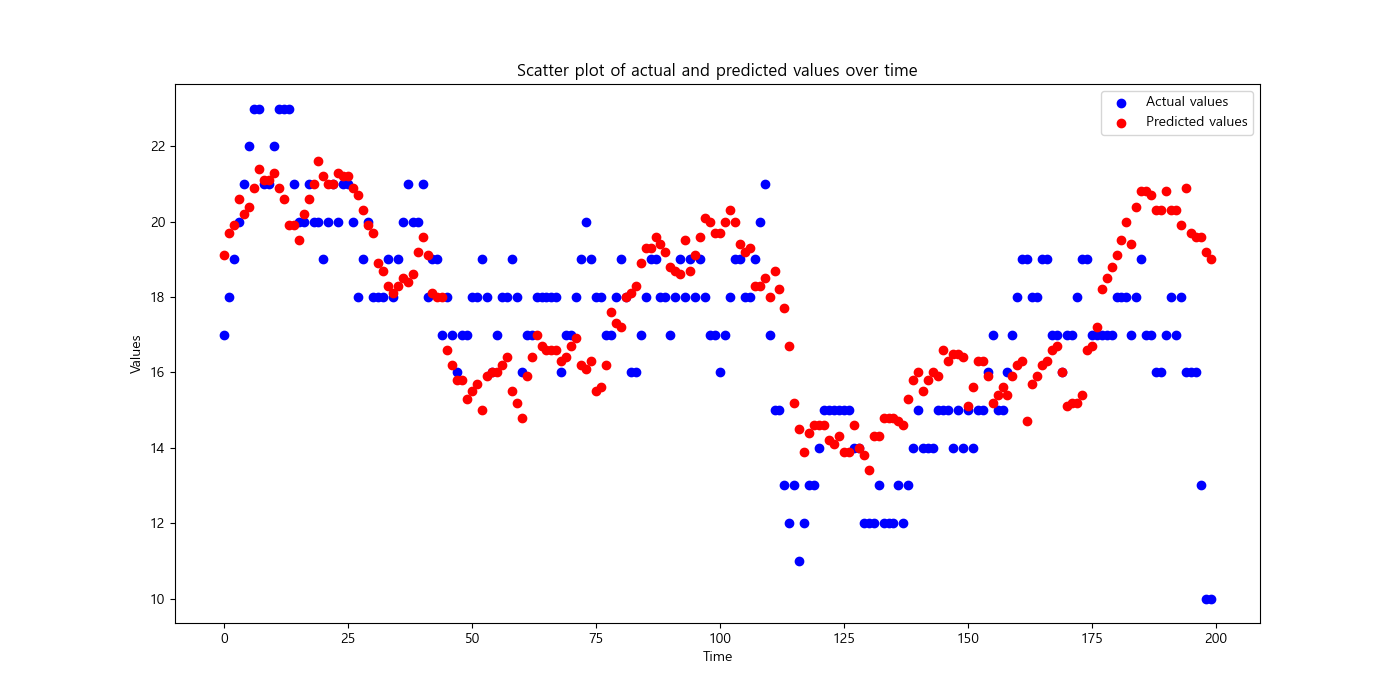

- 예측결과 평가

Train MAE: 0.682374367366332, Test MAE: 1.5281747057449124<br/>
Train MSE: 0.7317786359402605, Test MSE: 3.762176974672258<br/>
Train RMSE: 0.8554406092419627, Test RMSE: 1.9396332062202528<br/>
Train R^2: 0.9513785352430591, Test R^2: 0.8014684407417649<br/>
 
 ##### 학습할 데이터를 train_data와 teat_data로 시계열로 나누어 학습한 결과, train_data와 Test_data의 R^2 결과값이 각 95%, 80% 로 나타남. train_data에는 과적합 가능성이 보이며, test_data가 목표치인 80%를 넘었음. 현재 반영한 요인에 의한 학습 효과가 있다고 판단하였음. 이에 정확도를 향상하기 위해 파라미터 변경, 데이터 추가의 조치가 필요할 수 있음.

## XGBoost 모델 사용

XGBoost 모델을 사용하여 회귀 예측을 수행하였습니다. XGBoost는 그래디언트 부스팅 알고리즘을 기반으로 한 고성능 머신러닝 알고리즘이며, 결정 트리 알고리즘을 확장한 방식으로 작동합니다.

전체 데이터 세트를 무작위로 80%의 훈련 데이터와 20%의 테스트 데이터로 분할하였습니다. 이 분할은 sklearn의 train_test_split 함수를 사용하여 수행하였으며, 재현 가능한 결과를 보장하기 위해 random_state 값을 42로 설정하였습니다.

모델 구성은 다음과 같습니다

- n_estimators: 300, 이는 부스팅 단계의 수입니다.
- learning_rate: 0.08, 각 부스팅 단계에서 사용되는 축소 계수입니다.
- gamma: 0, 트리의 리프 노드를 추가적으로 나누는 것을 조절하는 매개변수입니다.
- subsample: 0.75, 각 트리를 구축할 때 사용되는 훈련 샘플의 비율입니다.
- colsample_bytree: 1, 각 트리를 구축할 때 사용되는 특성의 비율입니다.
- max_depth: 7, 트리의 최대 깊이를 결정합니다.

In [ ]:
# XGBoost regressor 모델
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

    - 결과 그래프

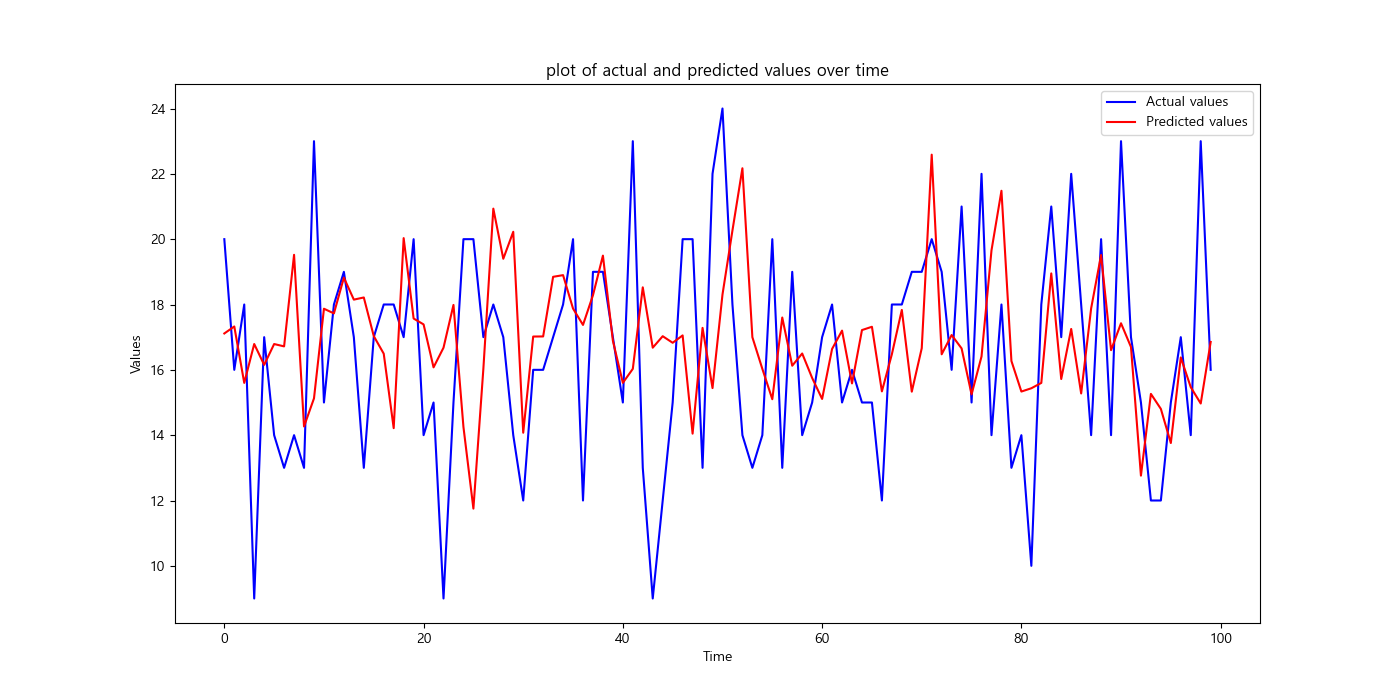

- 예측결과

Train RMSE:  4.2714401482166435<br/>
Train R-squared:  0.24842363567509007<br/>
Test RMSE:  4.829742627497037<br/>
Test R-squared:  0.05822734538732477<br/>

##### R-squared : 10% 미만의 정확도 나타나고 있으며, 파라미터 수정에 따른 정확도 향상 보이지 않음. 시뮬레이션 내 추가 피처 반영(실제 데이터 반영한)이 필요하거나 Data 크기를 현재 10,000개에서 늘려보는 것 등을 시도해 볼 필요가 있음

## RandomForest 모델

 랜덤 포레스트는 결정 트리를 기반으로 한 앙상블 기법 중 하나로, 여러 개의 결정 트리를 학습시킨 후 그 결과를 평균내어 예측을 진행합니다. 이는 모델의 과적합을 방지하고 일반화 성능을 향상시키는 데 도움이 됩니다.

특히, 랜덤 포레스트는 각 트리가 학습하는 데 사용하는 데이터와 특성을 무작위로 선택함으로써 다양성을 확보합니다. 이렇게 각각의 트리가 조금씩 다른 문제를 해결하도록 학습함으로써 전체적으로 더 안정적인 예측을 수행할 수 있습니다.

모델 구성은 다음과 같습니다.
- n_estimators: 랜덤 포레스트의 트리 개수를 결정하는 매개변수로, 이 경우 300개의 트리를 사용했습니다. 트리의 개수가 많을수록 모델의 성능이 향상될 수 있지만, 컴퓨팅 자원과 시간이 많이 소요될 수 있습니다.

- max_depth: 각 트리의 최대 깊이를 결정하는 매개변수로, 이 경우 10으로 설정되었습니다. 깊이가 깊을수록 모델은 더 복잡한 패턴을 학습할 수 있지만, 과적합의 위험이 있습니다.

- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 수를 결정하는 매개변수로, 이 경우 2로 설정되었습니다.

- min_samples_leaf: 리프 노드가 되기 위한 최소한의 샘플 수를 결정하는 매개변수로, 이 경우 1로 설정되었습니다.

- max_features: 각 트리에서 분할에 사용할 특성의 최대 개수를 결정하는 매개변수로, 이 경우 'auto'로 설정되었습니다. 이는 모든 특성을 사용하겠다는 의미입니다.

In [ ]:
# 랜덤 포레스트 모델 생성
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features='auto')

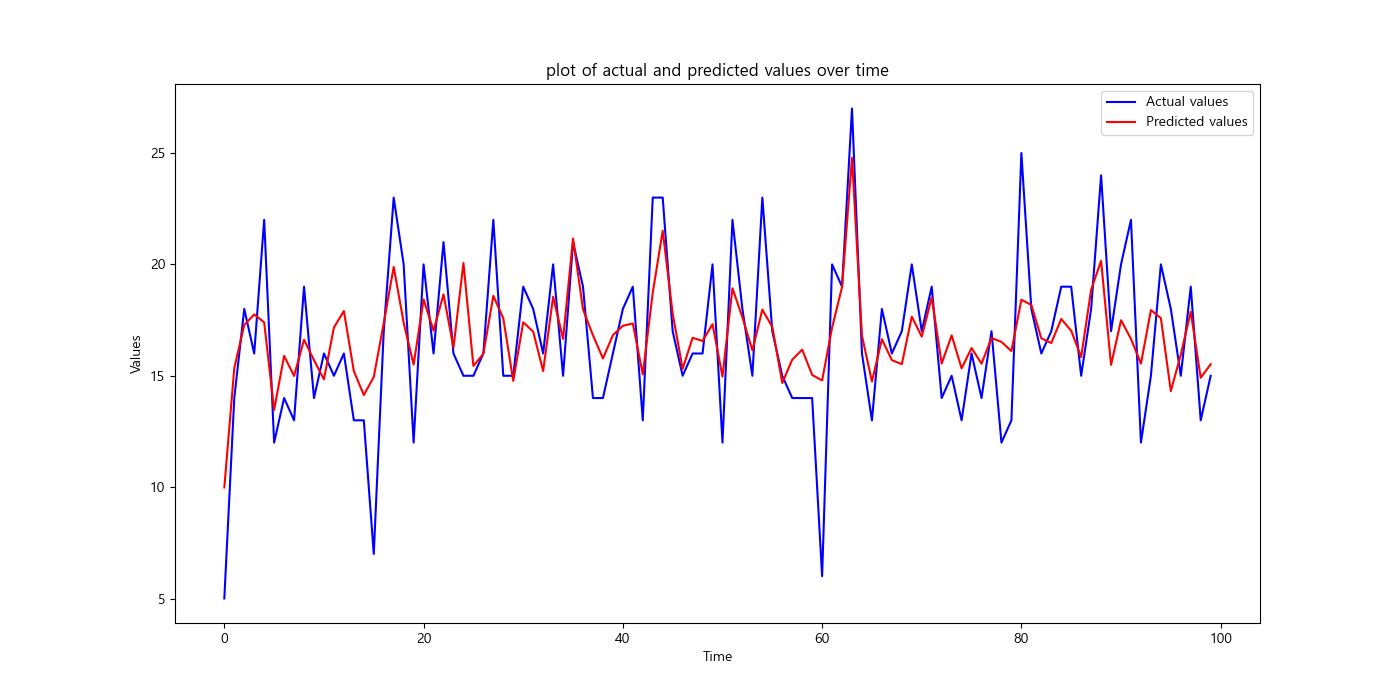

##### XGBOOST 모델과 거의 동일한 결과를 보임. R-squared 64% 정도의 정확도 나타나고 있으며, 파라미터 수정에 따른 정확도 향상 보이지 않음. 시뮬레이션 내 추가 피처 생성(실제 데이터 반영한)이 필요하거나 차량 수를 현재 1,000대에서 10,000대 이상으로 늘려보는 것 등을 시도해 볼 필요가 있음.

## CNN 모델

CNN 모델을 사용하여 회귀 예측을 수행하였습니다. CNN은 이미지 분석에 주로 사용되지만, 본 분석에서는 1차원 데이터인 시계열 데이터에 CNN을 적용하였습니다.

전체 데이터 세트를 시간 순서를 유지하면서 80%의 훈련 데이터와 20%의 테스트 데이터로 분할하였습니다. 이 분할은 데이터의 시간적 순서를 유지하기 위해 수행되었습니다.

데이터는 MinMaxScaler를 사용하여 정규화되었습니다. 이 과정에서 각 특성이 0과 1 사이의 범위에 들어오도록 조정되었습니다.

모델 구성은 다음과 같습니다:

- Conv1D Layer: 입력 데이터의 형태는 (X_train.shape[1], X_train.shape[2])입니다. Conv1D 레이어는 64개의 필터와 3의 커널 크기를 사용하며, 활성화 함수는 'relu'입니다.
    - 1D CNN은 시간에 따른 연속된 패턴을 감지하는 데 유용하며, 주로 시계열 데이터나 자연어 처리에서 사용됨.
    - 2D CNN은 이미지 같은 2차원 데이터에 사용되며, 3D CNN은 동영상과 같은 3차원 데이터(시간 포함)에 사용됨.

- MaxPooling1D Layer: 최대 풀링 레이어를 사용하여 feature map의 크기를 줄입니다. 여기서는 풀링 크기를 2로 설정하였습니다.

- Flatten Layer: CNN 레이어 후에는 데이터를 1차원으로 바꾸는 Flatten 레이어를 사용하였습니다.

- Dense Layer: 64개의 유닛과 'relu' 활성화 함수를 사용하는 Dense 레이어를 추가하였습니다.

- Output Layer: 최종적으로, 단일 유닛을 가진 Dense 레이어를 추가하였습니다. 이 레이어는 최종 예측값을 출력합니다.

In [ ]:
# CNN 모델
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

    - 결과 그래프

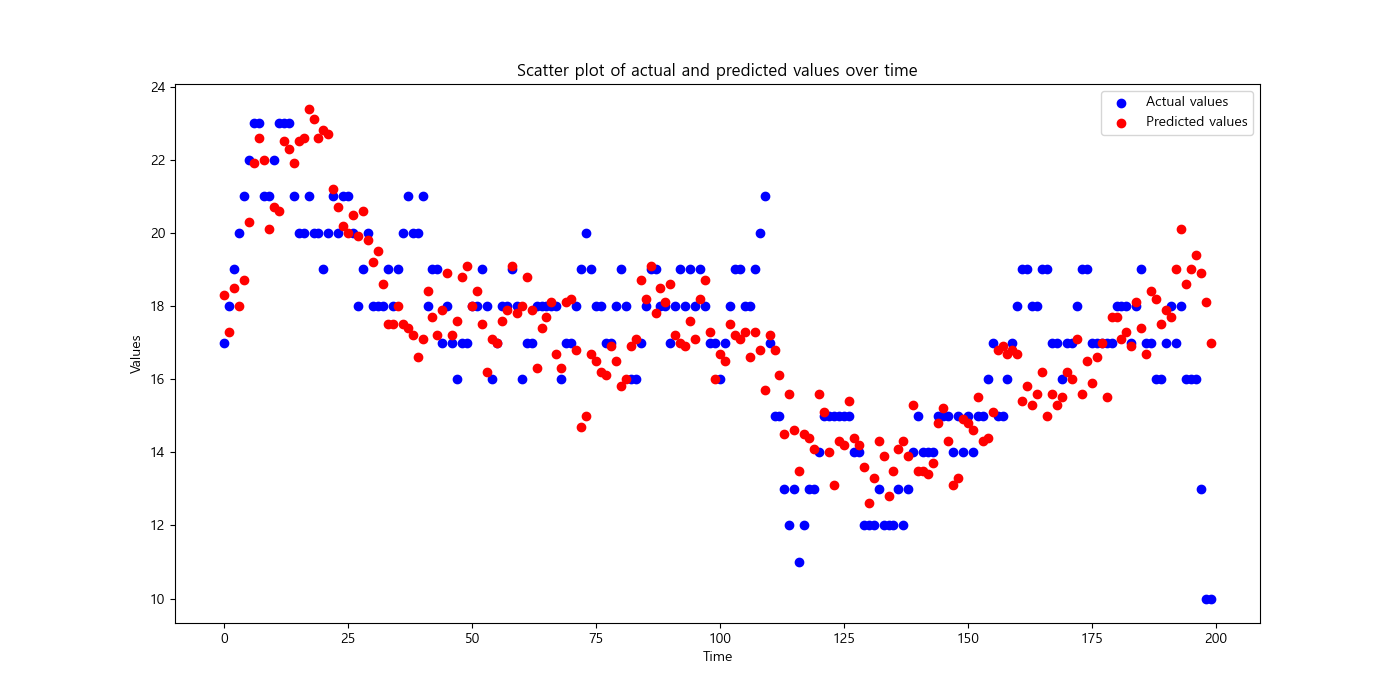

- 예측결과 평가

Train MAE: 0.2120166988744737, Test MAE: 1.5568489611679068<br/>
Train MSE: 0.08053424427042705, Test MSE: 3.8115208930436713<br/>
Train RMSE: 0.2837855603627976, Test RMSE: 1.952311679277587<br/>
Train R^2: 0.9968501293684924, Test R^2: 0.7887333848666227<br/>

 ##### 학습할 데이터를 train_data와 teat_data로 시계열로 나누어 학습한 결과, train_data(0~80)는 99% 이상의 정확도를 나타내는 결과가 나와 과적합임을 알 수 있음. test_data(81~100)은 78%로 성능을 향상할 필요가 있음

## 최종결과 <img width="25" alt="star1" src="https://user-images.githubusercontent.com/78655692/151471925-e5f35751-d4b9-416b-b41d-a059267a09e3.png">

- <u>야드 내 차량이 도착했을 때, 직전 차량이 배정된 작업장을 제외하고, 대기차량 및 작업차량이 가장 적은 작업장으로 배정하는 것만으로도 대기시간이 28% 줄어든 것으로 나타남.</u>

- <b><span style="color:black; background-color:#fcc419; font-size:100%">시뮬레이션에 더 많은 변수를 추가하여, 실제 운영 환경의 복잡성을 더 잘 반영하도록 개선하고자 함</span></b>
- <u>현재 야드 내 차량 시뮬레이션으로 생성한 데이터에서 향후 야드 내 차량 수를 예측하기 위해 4가지 머신러닝, 딥러닝 모델을 활용 및 비교한 결과, RNN 모델 중 하나인 LSTM의 성능이 가장 우수하게 나타남.</u>

-  <b><span style="color:black; background-color:#fcc419; font-size:100%">추가된 변수를 반영하여 예측을 수행하고, 모델 간 성능을 다시 비교해봐야 함</span></b>